In [2]:
import pandas as pd #to load and manipulate data and for one-hot encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs

from sklearn.tree import DecisionTreeClassifier #to build decision tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix # to create a confussion matrix
from sklearn.metrics import plot_confusion_matrix # to draw confusion matrix


Here we are going to load the dataset from the UCI [MACHINE LEARNING REPOSITORY, Heart Disease Dataset](https://archive-beta.ics.uci.edu/ml/datasets/heart+disease).


In [3]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We can see that in the data we don't have any column names but you can get the names from heart-disease.names.
Following column names are used:

age  
 sex  
 cp, chest pain  
 restbp, resting blood pressue (in mm Hg)  
 chol, serum cholestrol in mg/dl  
 fbs, fasting blood suger  
 restecg, resting electrocardiographic results  
 thalach, maximum heart rate achieved  
 exang, exercise induced angina  
 oldpeak, ST depression induced by exercise relative to rest  
 slope, the slope of the peak exercise ST segment  
 ca, number of major vessels(0-3) colored by fluoroscopy  
 thal, this is hort of thallium heart scan  
 hd, diagnosis of heart disease


In [5]:
df.columns = [
    'age',       
    'sex',       
    'cp',         
    'restbp',  
    'chol', 
    'fbs',       
    'restecg',   
    'thalach',   
    'exang',     
    'oldpeak',   
    'slope',     
    'ca',        
    'thal',      
    'hd',
]

In [6]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data
Identifying Missing Data

In [7]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
df['ca']

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object

In [9]:
# print out unique values in the column 'ca' 
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

## Dealing with Missing Data

In [11]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [12]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [13]:
#print out the rows that contain missing values
df.loc[(df['ca']=='?')
|
(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


# creating a new data frame without missing values

In [14]:
df_no_missing = df.loc[(df['ca'] != '?') 
&
(df['thal'] != '?')]

In [15]:
df_no_missing.shape

(297, 14)

In [16]:
df_no_missing['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [17]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Split the data into dependent and independent variables

In [18]:
X = df_no_missing.drop('hd',axis=1).copy()

In [19]:
#This is also same
#X=df_no_missing.iloc[:,:-1]

In [20]:
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [21]:
y = df_no_missing['hd'].copy()

In [22]:
#y=df_no_missing.iloc[:,-1:]

In [23]:
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

## Format the Data: One Hot Encoding

 * age - **Float**

 * sex - **Category**
	 *  0 = female
	 *  1 = male
* cp, chest pain - **Category**
	*  1 = typical angina
	*  2 = atypical angina
	*  3 = non-anginal pain
	*  4 = asymptomatic
* restbp, resting blood pressure(in mm Hg) - **Float**
* chol, serum cholesterol in mg/dl - **Float**
* fbs, fasting blood sugar - **Category**
	*  0 =>= 120 mg/dl
	* 1 =< 120 mg/dl
*  restecg, resting electrocardiographic results - **Category**
	* 0 = normal
	* 1 = having ST-T wave abnormality
	* 2 = showing probable or definite left venticular hypertrophy
* thalach, maximum heart rate achieved - **Float**
* exang, exercise induced angina - **Category**
	* 0 = no
	* 1 = yes
* oldpeak, St depression induced by exercise relative to rest - **Float**
* Slope, the slope of the peak exercise ST segment - **Category**
	* 1 = unsloping
	* 2 = flat
	* 3 = downsloping
* ca, number of major vessels(0-3) colored by fluoroscopy - **Float**
* Thal, thalium heart scan - **Category**
	* 3 = normal
	* 6 = fix defect
	* 7 = reversible defect 


In [24]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [25]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [26]:
X['restecg'].value_counts()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64

Two popular methods of doing it ColumnTransformer() from scikit learn and get_dummies() from pandas.

In [27]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [28]:
X_encoded = pd.get_dummies(X, columns=['cp',
'restecg',
'slope',
'thal'])

In [29]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


One-Hot encoding converts a column with more than 2 categories like sex. we do not have to do anything.

In [30]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [31]:
#Target value pre-processing not doing now.
y_not_zero_index = y > 0 #getting the index of non zero values
y[y_not_zero_index] = 1


## Building a preliminary Classification tree

In [32]:
#split the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=29)

In [52]:
clf_dt = DecisionTreeClassifier(random_state=29)
clf_dt = clf_dt.fit(X_train,y_train)

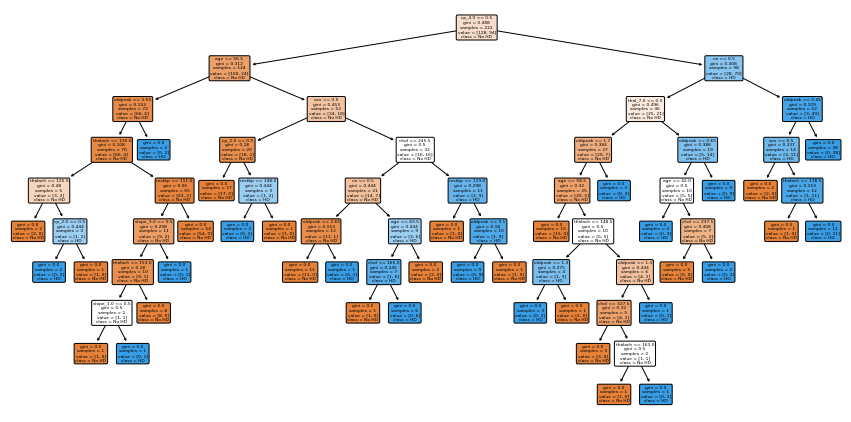

In [34]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
filled=True,
rounded=True,
class_names=['No HD', 'HD'],
#class_names=["0", "2", "1", "3", "4"],
feature_names=X_encoded.columns);

d:\ATT\Data_Science_Projects\Classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


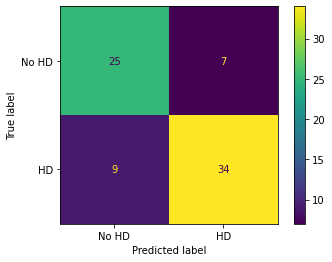

In [35]:
#Creating confusion matrix
#plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=["0", "2", "1", "3", "4"])
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels=['No HD', 'HD'])

### Cost complexity Pruning part 1: Visualize alpha
There are lot of parameters like max_depth, min_samples they reduce overfitting. How ever pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that improves the accurancy with the testing dataset.

Pruning a decision tree is all about finding the right value for the pruning parameter alpha, which controls how little or how much pruning happens.

We omit the maximum value of alpha with ccp_alphas = ccp_alphas[:-1] as it prune all leaves, leave us with only root instead of a tree.

In [36]:
path =  clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values of alpha
ccp_alphas = path.ccp_alphas #Extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #ex;ide the maximum value for alpha

clf_dts = []

#Creating decision tree per value for alpha and store it in array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 29, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

In [37]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

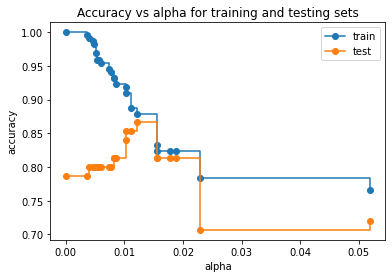

In [38]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas,train_scores, marker='o', label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores, marker='o', label='test',drawstyle='steps-post')
ax.legend()
plt.show()

## Cost complexity pruning part 2: cross validation for finding the best alpha
The graph we just drew suggested one value for alpha 0.010, but another set of data might suggest another optimal value.

We will do this by using the cross_val_score() function to generate different training and testing datasets then train and test the tree with the datasets.

<AxesSubplot:xlabel='tree'>

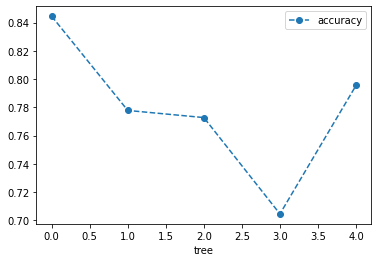

In [39]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.014)

#we are creating 5-fold cross validation as we don't have lots of data
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy', marker='o', linestyle='--')

The graph above shows that using different Training and testing data with the same alpha resulted in different accurancies, suggesting that alpha is sensitive to the datasets. So instead of picking a single train dataset and signal testing dataset, let's use cross validation to find the optimal value for ccp_alpha.

<AxesSubplot:xlabel='alpha'>

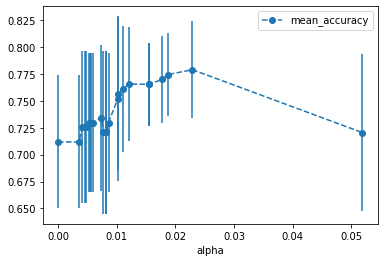

In [40]:
alpha_loop_values = [] #store the results

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])


#Now we can draw a graph of mean and standard deviations of the scores
alpha_results = pd.DataFrame(alpha_loop_values,
columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
y= 'mean_accuracy',
yerr='std',
marker='o',
linestyle='--')


In [41]:
alpha_results[(alpha_results['alpha'] > 0.02)
&
(alpha_results['alpha'] < 0.025)
]

,alpha,mean_accuracy,std
22,0.022916,0.77899,0.045029


In [42]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.02)
&
(alpha_results['alpha'] < 0.025)
]['alpha']

In [43]:
type(ideal_ccp_alpha)

pandas.core.series.Series

In [44]:
ideal_ccp_alpha = float(ideal_ccp_alpha)

In [45]:
type(ideal_ccp_alpha)

float

### Building, Evaluating, Drawing in the Final Classification Tree

In [46]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

d:\ATT\Data_Science_Projects\Classification\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


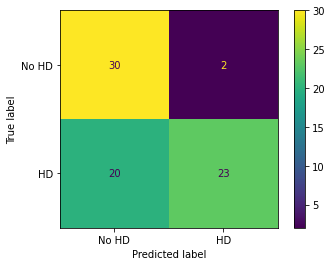

In [47]:
plot_confusion_matrix(clf_dt_pruned,X_test,y_test, display_labels=['No HD', 'HD'])

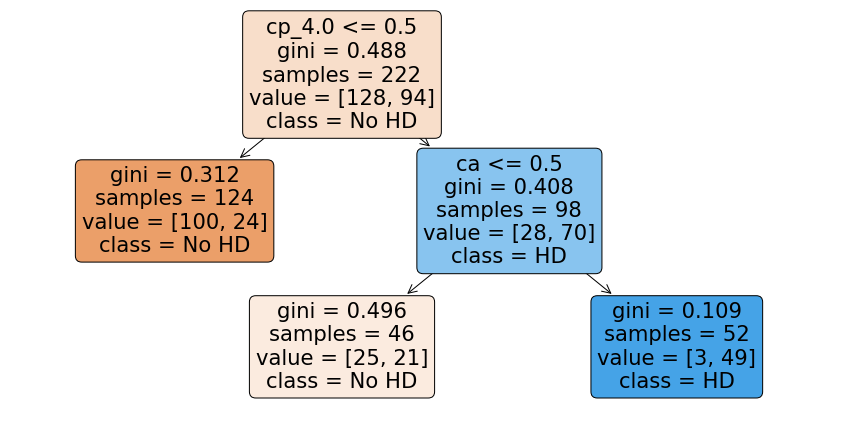

In [48]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
filled=True,
rounded=True,
class_names=['No HD', 'HD'],
feature_names=X_encoded.columns);

## calculing f1 score
F1 Score = 2*(Precision * Recall)/(Precision + Recall)
Precision = True Positive / (True Positive + False Positive)
Recall = True Positive / (True Positive + False Negative)

In [49]:
from sklearn.metrics import f1_score
print(f1_score(y_test, clf_dt_pruned.predict(X_test)))

0.6764705882352942


In [53]:
print(f1_score(y_test, clf_dt.predict(X_test)))

0.8095238095238095
